# PROJETO 3
### ANÁLISE DE DADOS DE E-COMMERCE

Centro Paula Souza

Faculdade de Tecnologia de Votorantim

Curso de Ciência de Dados para Negócios 3º Semestre

Aluna: Ana Elisa Rubinato Cavalheiro

---
Introdução:

Este projeto tem como fundamento realizar uma análise detalhada dos dados de um e-commerce, utilizando as transações passadas para identificar padrões de compra e oferecer insights valiosos. 

________________________________________
E-commerce

O e-commerce, ou comércio eletrônico, é um modelo de negócio que permite a compra e venda de produtos ou serviços por meio da internet. Diferente das lojas físicas, um e-commerce funciona de forma digital, podendo operar 24 horas por dia, sete dias por semana, e alcançar clientes em qualquer lugar do mundo.

Vantagens do E-commerce
✅ Maior alcance – A empresa pode vender para clientes em qualquer lugar.
✅ Operação 24/7 – Diferente das lojas físicas, um e-commerce nunca fecha.
✅ Redução de custos – Menos gastos com aluguel e funcionários.
✅ Facilidade de personalização – Promoções e recomendações baseadas no comportamento do usuário.
✅ Análise de dados – Permite entender melhor os clientes e otimizar estratégias de marketing.

Desafios do E-commerce
⚠ Concorrência alta – Muitas opções disponíveis para o consumidor.
⚠ Logística eficiente – Garantir entregas rápidas e seguras.
⚠ Confiança do consumidor – É essencial investir em segurança digital e boas práticas.
⚠ Taxa de cancelamento e devolução – Produtos podem não atender às expectativas dos clientes.

---
Fase 1 – Explicação do problema de negócio e dos objetivos:

Problema do Négocio:
Como o e-commerce pode identificar padrões de compra, segmentar clientes de forma eficiente e 
reduzir cancelamentos para aumentar a lucratividade?

A análise de dados no e-commerce permite identificar padrões de compra, otimizando a segmentação de clientes e a personalização de ofertas. Ao compreender o comportamento do consumidor, é possível reduzir cancelamentos, melhorar o atendimento e aprimorar a experiência de compra. Essa abordagem estratégica aumenta a eficiência do marketing e impulsiona a lucratividade do negócio.

Objetivos:
1.	Compreensão do Negócio e do Problema: Identificar desafios do e-commerce e definir métricas de sucesso.
2.	Compreensão dos Dados: Explorar, limpar e enriquecer os dados para análise precisa.
3.	Análise Exploratória de Dados (EDA): Investigar padrões de compra, produtos mais vendidos, impacto de preços e causas de cancelamentos.
4.	Segmentação de Clientes:Criar grupos com base em comportamentos de compra para personalização.
5.	Geração de Insights e Recomendações: Sugerir estratégias para reduzir cancelamentos, fidelizar clientes, otimizar vendas e campanhas de marketing.

---

Fase 2 – Descrição do dataset e dos desafios encontrados

Carregando os Dados 

In [88]:
# importando o pacote Pandas
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

In [89]:
# Carregar o dataset para a memória (utilizando pandas)

df = pd.read_csv('data.csv', encoding='latin1')

In [90]:
# Mostrando as principais informaçoes do Dataframe 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


Inicialmente, os dados foram recebidos por meio de um arquivo CSV, contendo oito colunas com as seguintes informações:

•	InvoiceNo – Número da fatura, identificador único para cada transação.

•	StockCode – Código do produto, usado para identificar o item vendido.

•	Description – Descrição do produto ou item vendido.

•	Quantity – Quantidade de itens comprados na transação.

•	InvoiceDate – Data da fatura, indicando quando a transação ocorreu.

•	UnitPrice – Preço unitário do item vendido.

•	CustomerID – Identificador do cliente, usado para rastrear quem realizou a compra.

•	Country – País onde o cliente está localizado.

In [91]:
# Identificando a quantidade de valores nulos
print(df.isnull().sum())

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64


In [92]:
# Tratamento de valores nulos
df = df.dropna()

In [93]:
#Verificando quais são as colunas com tipo numerico
colunas_numericas = df.select_dtypes(include=['number']).columns
print(colunas_numericas)

Index(['Quantity', 'UnitPrice', 'CustomerID'], dtype='object')


In [94]:
# Verificando se tem valores negativos
valores_negativos = (df[colunas_numericas] < 0).any().any()

if valores_negativos:
    print("Existem valores negativos em pelo menos uma coluna numérica.")
else:
    print("Não existem valores negativos em nenhuma coluna numérica.")

Existem valores negativos em pelo menos uma coluna numérica.


In [95]:
# Verificando duplicidade nos registros
print(df.nunique(), "IDs únicos de um total de ", len(df), " entradas.")


InvoiceNo      22190
StockCode       3684
Description     3896
Quantity         436
InvoiceDate    20460
UnitPrice        620
CustomerID      4372
Country           37
dtype: int64 IDs únicos de um total de  406829  entradas.


In [96]:
# Criando colunas : Total gasto por transação
df['TotalSpent'] = df['Quantity'] * df['UnitPrice']

In [97]:
# Total gasto por cliente
customer_total_spent = df.groupby('CustomerID')['TotalSpent'].sum()
df['CustomerTotalSpent'] = df['CustomerID'].map(customer_total_spent)

In [98]:
#Frequencia_Compra_Dias
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])  # Converter para datetime

# Ordenar as datas de compra para cada cliente
df = df.sort_values(by=['CustomerID', 'InvoiceDate'])

# Calcular o tempo entre as compras
df['Frequencia_Compra_Dias'] = df.groupby('CustomerID')['InvoiceDate'].diff().dt.days

# Preencher o primeiro valor com 0 (ou outro valor adequado)
df['Frequencia_Compra_Dias'] = df['Frequencia_Compra_Dias'].fillna(0).astype(int)

# Exibir os resultados
print(df[['CustomerID', 'InvoiceDate', 'Frequencia_Compra_Dias']].head(5))

       CustomerID         InvoiceDate  Frequencia_Compra_Dias
61619     12346.0 2011-01-18 10:01:00                       0
61624     12346.0 2011-01-18 10:17:00                       0
14938     12347.0 2010-12-07 14:57:00                       0
14939     12347.0 2010-12-07 14:57:00                       0
14940     12347.0 2010-12-07 14:57:00                       0


In [99]:
print(df.head(5))

      InvoiceNo StockCode                        Description  Quantity  \
61619    541431     23166     MEDIUM CERAMIC TOP STORAGE JAR     74215   
61624   C541433     23166     MEDIUM CERAMIC TOP STORAGE JAR    -74215   
14938    537626     85116    BLACK CANDELABRA T-LIGHT HOLDER        12   
14939    537626     22375  AIRLINE BAG VINTAGE JET SET BROWN         4   
14940    537626     71477  COLOUR GLASS. STAR T-LIGHT HOLDER        12   

              InvoiceDate  UnitPrice  CustomerID         Country  TotalSpent  \
61619 2011-01-18 10:01:00       1.04     12346.0  United Kingdom     77183.6   
61624 2011-01-18 10:17:00       1.04     12346.0  United Kingdom    -77183.6   
14938 2010-12-07 14:57:00       2.10     12347.0         Iceland        25.2   
14939 2010-12-07 14:57:00       4.25     12347.0         Iceland        17.0   
14940 2010-12-07 14:57:00       3.25     12347.0         Iceland        39.0   

       CustomerTotalSpent  Frequencia_Compra_Dias  
61619                 

Nessas colunas, realizamos vericação nos tipos de dados para garantir maior consistência e facilitar a análise. 
Durante a análise dos dados, identificamos colunas com erros, valores em branco ou informações nulas. Esses problemas indicam que houve alguma inconsistência no processo de exportação dos dados, possivelmente devido a falhas na coleta ou no armazenamento das informações. A presença desses dados ausentes poderia comprometer a qualidade e a confiabilidade da análise, influenciando negativamente os insights extraídos. Diante disso, realizamos um processo de limpeza, excluindo essas informações inconsistentes para garantir que apenas dados relevantes e íntegros fossem utilizados no estudo. Essa abordagem permite obter resultados mais precisos e embasar melhor as decisões estratégicas

Na análise de dados, criamos três colunas importantes para entender melhor o comportamento de compra dos clientes:

* Total Gasto por Transação (TotalSpent): Essa coluna representa o valor total gasto em cada compra individual. Calculamos multiplicando a quantidade de itens comprados pelo preço unitário. Isso nos permite analisar o valor de cada transação, identificar compras de alto valor e calcular o gasto total de cada cliente.

* Total Gasto por Cliente (customer_total_spent): Essa coluna mostra o valor total que cada cliente gastou ao longo de todas as suas compras. Para calcular, agrupamos as transações por 'CustomerID' e somamos os valores da coluna 'TotalSpent' para cada cliente. Com essa coluna, podemos identificar os clientes que mais gastam, segmentá-los por valor gasto e criar estratégias de fidelização.

* Frequência de Compra em Dias (Frequencia_Compra_Dias): Essa coluna indica o tempo em dias entre as compras de cada cliente. Calculamos convertendo a coluna 'InvoiceDate' para o formato de data, ordenando as compras de cada cliente por data e calculando a diferença entre as datas de compra consecutivas. Essa coluna nos ajuda a entender a frequência de compra de cada cliente, identificar clientes frequentes e criar estratégias de retenção.

---

Fase 3 – Análises e insights relevantes (com gráficos e tabelas explicativas)

Cenário 1: Distribuição do Total Gasto por Cliente (customer_total_spent)

Este gráfico mostrará como o gasto total dos clientes está distribuído.

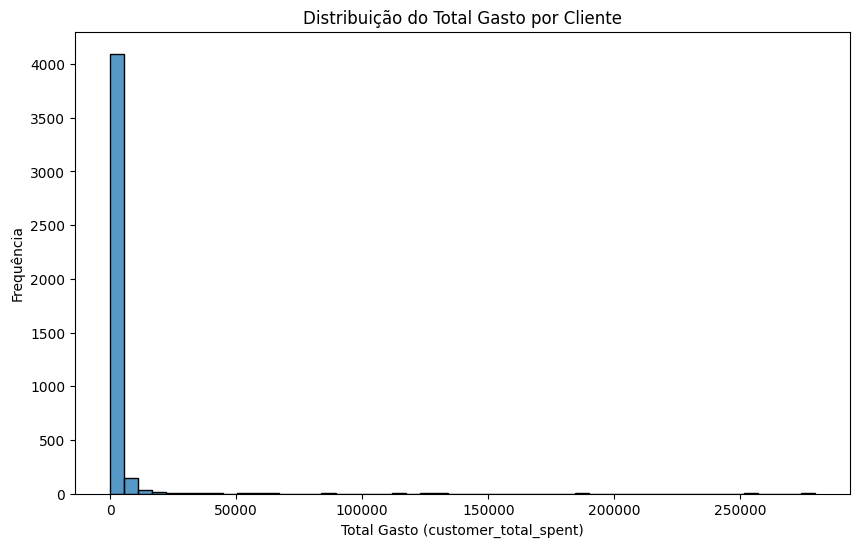

In [124]:
# Agrupar por CustomerID e somar TotalSpent
customer_total_spent = df.groupby('CustomerID')['TotalSpent'].sum()

# Filtrar para remover valores zero
customer_total_spent_filtered = customer_total_spent[customer_total_spent > 0]

plt.figure(figsize=(10, 6))
sns.histplot(customer_total_spent_filtered, bins=50)
plt.title('Distribuição do Total Gasto por Cliente')
plt.xlabel('Total Gasto (customer_total_spent)')
plt.ylabel('Frequência')
plt.show()

 O gráfico exibe uma distribuição com assimetria positiva, ou seja, a cauda da distribuição se estende para a direita. Isso indica que a maioria dos clientes gasta valores relativamente baixos, enquanto uma minoria gasta valores significativamente mais altos.

 ---

Cenário 2: Total de vendas por país.

Gráfico de barras horizontais, mostrando o Top 10 dos paises que mais vendeu.

Tabela mostrando o total de vendas para cada país

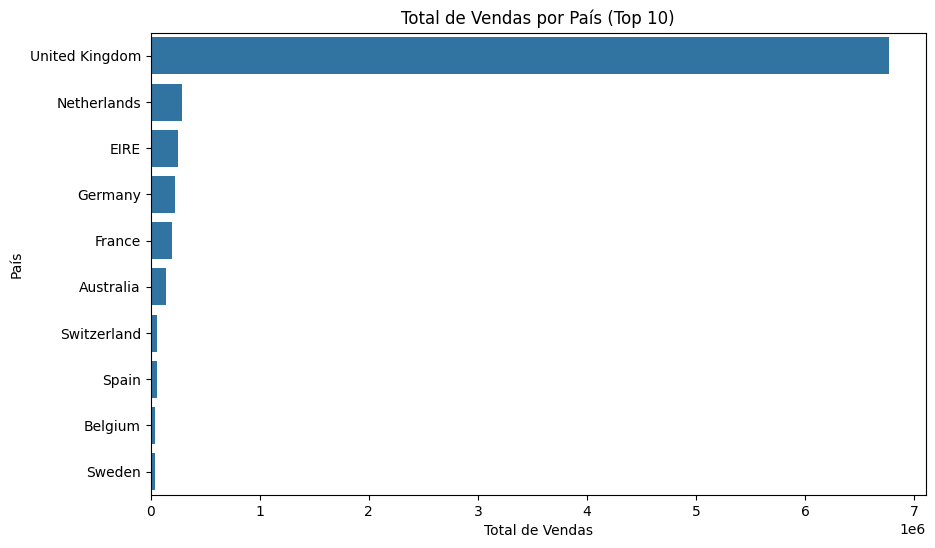

In [125]:
sales_by_country = df.groupby('Country')['TotalSpent'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x=sales_by_country.values, y=sales_by_country.index)
plt.title('Total de Vendas por País (Top 10)')
plt.xlabel('Total de Vendas')
plt.ylabel('País')
plt.show()

In [126]:
print(sales_by_country)

Country
United Kingdom    6767873.394
Netherlands        284661.540
EIRE               250285.220
Germany            221698.210
France             196712.840
Australia          137077.270
Switzerland         55739.400
Spain               54774.580
Belgium             40910.960
Sweden              36595.910
Name: TotalSpent, dtype: float64


O grafico e tabela apresentada mostra os 10 países que mais geraram vendas para a empresa, listados em ordem decrescente de acordo com o valor total das vendas. O Reino Unido se destaca como o principal mercado, com um valor de vendas significativamente maior do que os demais países. Em seguida, temos outros países europeus como Holanda, Irlanda, Alemanha, França, Suíça, Espanha, Bélgica e Suécia, que também contribuem para as vendas da empresa, embora em menor escala. A Austrália é o único país não europeu na lista, indicando uma presença global da empresa, mas com um volume de vendas consideravelmente menor em comparação com o Reino Unido. Em resumo, a tabela revela que a empresa tem uma forte presença no mercado europeu, com o Reino Unido como seu principal mercado, e uma presença global limitada, com a Austrália como um mercado secundário.

---

Cenário 3: 

Gráfico mostrando o Top 5 dos dos produtos mais vendidos nos paises.

Tabela mostrando a quantidade total vendida de cada produto.

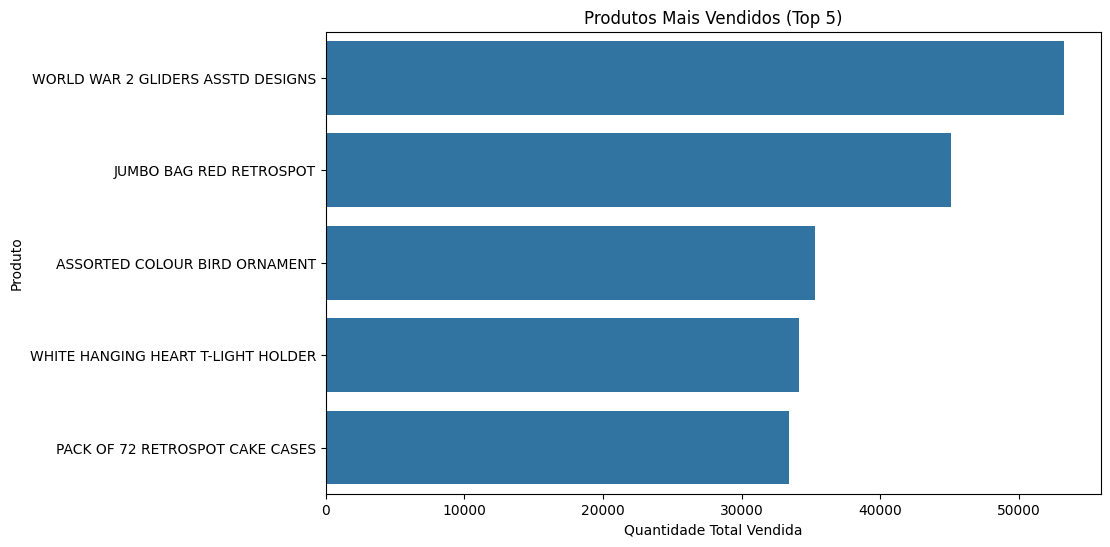

In [134]:
top_products = df.groupby('Description')['Quantity'].sum().sort_values(ascending=False).head(5)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_products.values, y=top_products.index)
plt.title('Produtos Mais Vendidos (Top 5)')
plt.xlabel('Quantidade Total Vendida')
plt.ylabel('Produto')
plt.show()

In [128]:
print(top_products)

Description
WORLD WAR 2 GLIDERS ASSTD DESIGNS     53215
JUMBO BAG RED RETROSPOT               45066
ASSORTED COLOUR BIRD ORNAMENT         35314
WHITE HANGING HEART T-LIGHT HOLDER    34147
PACK OF 72 RETROSPOT CAKE CASES       33409
POPCORN HOLDER                        30504
RABBIT NIGHT LIGHT                    27094
MINI PAINT SET VINTAGE                25880
PACK OF 12 LONDON TISSUES             25321
PACK OF 60 PINK PAISLEY CAKE CASES    24163
Name: Quantity, dtype: int64


O gráfico de barras horizontais destaca os cinco produtos com o maior volume de vendas, ordenados do mais vendido para o menos vendido. A barra mais longa no topo do gráfico indica o produto líder em vendas, com uma quantidade significativamente maior em comparação aos demais produtos. Os outros quatro produtos no gráfico também apresentam vendas expressivas, mas em volumes decrescentes.

A tabela complementar expande essa informação, listando os dez produtos com as maiores quantidades vendidas. Além dos cinco produtos exibidos no gráfico, a tabela revela outros cinco itens populares, embora com volumes de venda inferiores. Essa visão geral permite identificar os produtos com maior demanda e a variação nas quantidades vendidas entre eles, fornecendo informações valiosas para otimizar estratégias de marketing, gestão de estoque e análise de tendências de mercado.

----

Cenário 4: 

Gráfico mostrando o Top 10  dos clientes com maior gasto


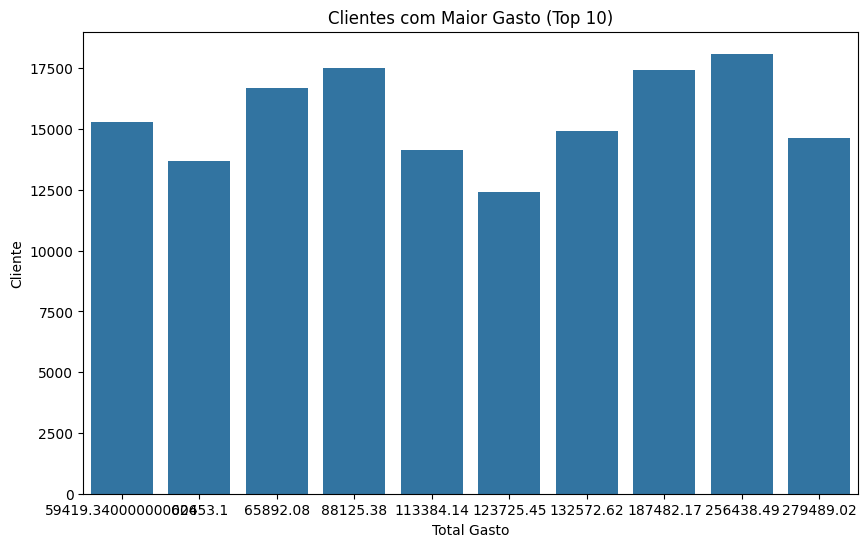

In [129]:
top_customers = df.groupby('CustomerID')['TotalSpent'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_customers.values, y=top_customers.index)
plt.title('Clientes com Maior Gasto (Top 10)')
plt.xlabel('Total Gasto')
plt.ylabel('Cliente')
plt.show()

O gráfico  ilustra os dez clientes que mais contribuíram em termos de gastos para a empresa. A altura de cada barra representa o valor total que cada cliente despendeu. É evidente que há uma variação significativa nos gastos entre esses clientes, com alguns deles demonstrando um valor de compra consideravelmente superior aos demais. Essa disparidade evidencia a existência de clientes de alto valor, que desempenham um papel crucial na receita da empresa. A empresa deve, portanto, implementar estratégias de fidelização e oferecer atendimento personalizado para manter esses clientes satisfeitos, além de analisar seus padrões de compra para otimizar suas operações e campanhas de marketing direcionadas."

---

Cenário 5: 

Gráfico Distribuição da Frequência de Compra por Cliente

Tabela mostra os 10 primeiros clientes e a frequencia de compra deles.

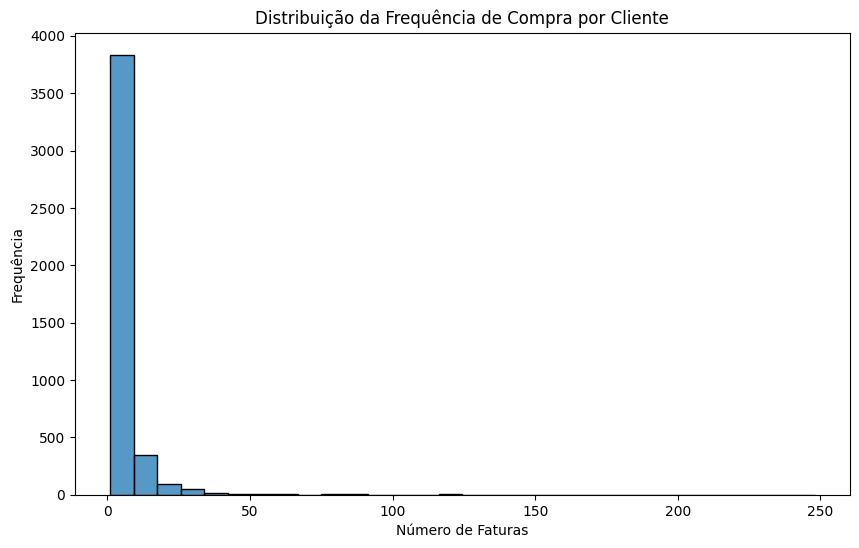

In [131]:
customer_frequency = df.groupby('CustomerID')['InvoiceNo'].nunique()

plt.figure(figsize=(10, 6))
sns.histplot(customer_frequency, bins=30)
plt.title('Distribuição da Frequência de Compra por Cliente')
plt.xlabel('Número de Faturas')
plt.ylabel('Frequência')
plt.show()

In [132]:
print(customer_frequency.head(10))

CustomerID
12346.0     2
12347.0     7
12348.0     4
12349.0     1
12350.0     1
12352.0    11
12353.0     1
12354.0     1
12355.0     1
12356.0     3
Name: InvoiceNo, dtype: int64


O gráfico de histograma ilustra a distribuição da frequência de compra dos clientes, representada pelo número de faturas únicas emitidas para cada um. A grande maioria dos clientes (indicada pela barra alta no lado esquerdo do gráfico) possui um número de faturas muito baixo, sugerindo que eles fizeram poucas compras. No entanto, há alguns clientes com um número significativamente maior de faturas, indicando uma alta frequência de compra.

A tabela complementar exibe os dez primeiros clientes e o número de faturas associadas a cada um. Ela confirma a observação do gráfico, mostrando que a maioria dos clientes possui um número de faturas muito baixo, com alguns clientes tendo apenas uma fatura. No entanto, há alguns clientes com um número consideravelmente maior de faturas, como o cliente com ID 12352.0, que possui 11 faturas.

A análise conjunta do gráfico e da tabela revela que a maioria dos clientes realiza poucas compras, mas há um grupo menor de clientes com alta frequência de compra. Essa informação é valiosa para a empresa direcionar suas estratégias de marketing e fidelização, focando nos clientes com maior potencial de compra.

---

Cenário 6: 

Gráfico Distribuição das Vendas por mês 

Tabela mostra distribuição das Vendas por semana

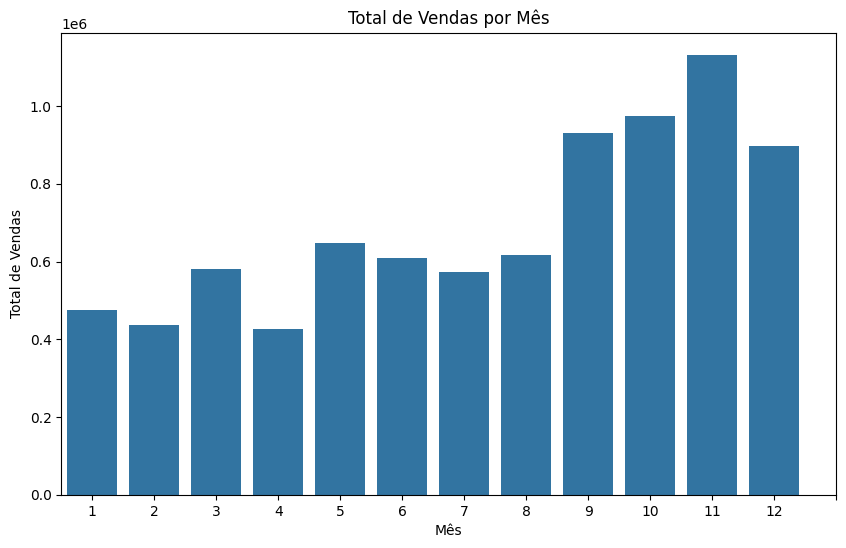

In [137]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])  # Converter para datetime
df['Month'] = df['InvoiceDate'].dt.month
sales_by_month = df.groupby('Month')['TotalSpent'].sum()
plt.figure(figsize=(10, 6))
sns.barplot(x=sales_by_month.index, y=sales_by_month.values)
plt.title('Total de Vendas por Mês')
plt.xlabel('Mês')
plt.ylabel('Total de Vendas')
plt.xticks(range(0, 13))  # Definir rótulos dos meses
plt.show()

In [140]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])  # Converter para datetime
df['DayOfWeek'] = df['InvoiceDate'].dt.day_name()
sales_by_day = df.groupby('DayOfWeek')['TotalSpent'].sum()
days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
sales_by_day = sales_by_day.reindex(days_order).fillna(0)
print(sales_by_day)


DayOfWeek
Monday       1274551.511
Tuesday      1563193.591
Wednesday    1530477.490
Thursday     1906108.190
Friday       1241316.181
Saturday           0.000
Sunday        784418.851
Name: TotalSpent, dtype: float64


O gráfico apresenta o volume total de vendas para cada mês do ano. É notável a sazonalidade nas vendas, com um aumento significativo nos meses de outono e inverno, especificamente de setembro a dezembro. Em contraste, os meses de verão e primavera exibem um volume de vendas relativamente baixo. Essa variação sazonal indica a necessidade de adaptar estratégias de marketing e gestão de estoque para atender à demanda flutuante ao longo do ano.

A tabela complementar detalha o volume total de vendas para cada dia da semana. Os dias úteis, de segunda a sexta-feira, apresentam um volume de vendas consideravelmente maior em comparação com os finais de semana. Entre os dias úteis, quinta-feira se destaca como o dia de maior movimento, seguido por terça e quarta-feira. Os finais de semana, sábado e domingo, registram os menores volumes de vendas. Essa informação é crucial para otimizar operações, promoções e estratégias de marketing, direcionando esforços para os dias de maior movimento e explorando oportunidades para aumentar as vendas nos finais de semana.

---

Fase 4: Segmentação de Clientes e Recomendações Estratégicas

* Segmentação:
Clientes de Alto Valor (VIPs):
São os clientes que mais gastam, evidenciado no gráfico "Clientes com Maior Gasto (Top 10)".
Representam uma parcela menor da base, mas crucial para a receita.
Recomendações: Programas de fidelidade exclusivos, atendimento personalizado, eventos exclusivos.

* Clientes Frequentes:
Alta frequência de compra, conforme o gráfico "Distribuição da Frequência de Compra por Cliente".
Lealdade à marca, mesmo com gastos individuais menores.
Recomendações: Assinaturas, programas de recompensa, comunicação personalizada.

* Clientes Ocasionais:
Maioria da base, potencial de crescimento, poucas compras.
Recomendações: Campanhas de e-mail marketing, remarketing, programas de indicação.

* Clientes Internacionais:
Comportamento variado, adaptação por país, Reino Unido principal mercado.
Recomendações: Tradução de site, opções de pagamento locais, parcerias com influenciadores.

Sazonalidade nas Compras:

* Padrão Mensal:

Observamos um aumento significativo nas vendas durante os meses de outono e inverno (setembro a dezembro), conforme mostrado no gráfico "Total de Vendas por Mês".
Isso indica que os clientes tendem a comprar mais durante esses meses, possivelmente devido a feriados, promoções de fim de ano ou mudanças climáticas.

* Padrão Semanal:

Os dias úteis (segunda a sexta-feira) apresentam um volume de vendas maior em comparação com os finais de semana, com quinta-feira sendo o dia de maior movimento, conforme a tabela "Total de Vendas por Dia da Semana".
Isso sugere que os clientes preferem fazer compras durante a semana, possivelmente durante o horário de trabalho ou em seus intervalos.



Recomendações Estratégicas:

Personalização: Adapte comunicação e ofertas por segmento, aumentando relevância.

Fidelização: Recompensas e benefícios para VIPs e frequentes, incentivando lealdade.

Crescimento: Campanhas direcionadas para clientes ocasionais, transformando-os em regulares.

Expansão Internacional: Adapte site, pagamentos e marketing para mercados-chave.

Sazonalidade: Adapte marketing e estoque para meses de alta demanda, conforme o gráfico "Total de Vendas por Mês".

Padrões Semanais: Otimize operações e promoções para os dias de maior movimento, conforme a tabela "Total de Vendas por Dia da Semana".

Cesta de Compras: Analise produtos comprados juntos para promoções com combos.

Experiência de Compra: Personalize recomendações com base no histórico e otimize o site.

Atendimento: Suporte multicanal e coleta de feedback para melhorias.

---

Fase 5: Sugestões para a empresa melhorar vendas e retenção 

Otimização da Experiência de Compra:

Melhoria do Site:
Otimizar a velocidade de carregamento do site.
Simplificar a navegação e o processo de checkout.
Garantir que o site seja responsivo em dispositivos móveis.
Personalização:
Implementar um sistema de recomendação de produtos com base no histórico de compras e nas preferências dos clientes.
Enviar e-mails personalizados com ofertas e promoções relevantes.
Marketing Estratégico:

Promoções Sazonais:
Criar campanhas de marketing temáticas para os meses de outono e inverno, aproveitando o aumento nas vendas.
Oferecer descontos e promoções especiais nos dias da semana com maior movimento (quinta, terça e quarta-feira).
Análise de Cesta de Compras:
Identificar produtos frequentemente comprados juntos e criar combos ou promoções para incentivar a compra de mais itens.
Utilizar remarketing para exibir anúncios de produtos relacionados aos itens que os clientes já compraram.
Marketing Direcionado:
Adapte o marketing de acordo com a sazonalidade de vendas, e com os dias da semana de maior movimento.
Atendimento ao Cliente:

Suporte Multicanal:
Oferecer suporte por telefone, e-mail, chat online e redes sociais para atender às diferentes preferências dos clientes.
Implementar um sistema de acompanhamento de tickets para garantir que todas as solicitações sejam atendidas de forma eficiente.
Coleta de Feedback:
Enviar pesquisas de satisfação aos clientes após a compra para identificar áreas de melhoria.
Monitorar as redes sociais e os sites de avaliação para identificar e responder a comentários e reclamações.
Gestão de Estoque:

Previsão de Demanda:
Analisar os dados de vendas para prever a demanda futura e garantir que os produtos mais vendidos estejam sempre disponíveis.
Ajustar os níveis de estoque de acordo com a sazonalidade das vendas.
Gerenciamento de Fornecedores:
Negociar prazos de entrega mais curtos com os fornecedores para evitar a falta de estoque.
Diversificar os fornecedores para reduzir o risco de interrupções no fornecimento.
Programas de Fidelidade:

Recompensas por Compras:
Criar um programa de fidelidade que ofereça pontos ou descontos para cada compra realizada.
Oferecer benefícios exclusivos para os clientes VIPs, como acesso antecipado a produtos e eventos especiais.
Comunicação Personalizada:
Enviar e-mails personalizados com ofertas e promoções exclusivas para os membros do programa de fidelidade.
Criar um clube de vantagens com descontos em produtos e serviços de parceiros.
Expansão Internacional:

Adaptação Cultural:
Traduzir o site e o conteúdo para os idiomas dos principais mercados internacionais.
Adaptar as campanhas de marketing para as diferentes culturas e costumes.
Opções de Pagamento Locais:
Oferecer opções de pagamento populares em cada país, como cartões de crédito locais e carteiras digitais.
Adaptar a logística e a entrega para atender às necessidades de cada mercado.


Ao implementar essas sugestões, a empresa poderá melhorar suas vendas, aumentar a retenção de clientes e expandir sua presença no mercado internacional.
